In [71]:
#####JAN - MAY 2017: LINKS
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

###load all the datasets
##meta_data file
all_df = pd.read_csv('/Users/eshwarchandrasekharan/Downloads/jan_may_2017_links')
all_df = all_df.fillna(0)

In [72]:
all_df.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date'],
      dtype='object')

Without cross-promotion features
Testing for shares!
(29784, 10) (29784,)
(7447, 10) (7447,)


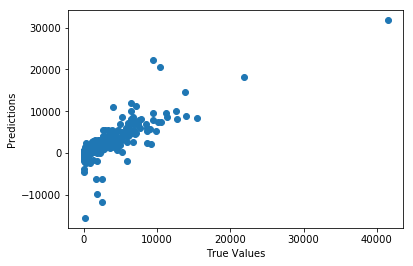

Predict  share
Trial run - Score: 0.724861235214
Cross-validated scores: [ 0.77239694  0.81743226  0.81118261  0.82001008  0.86901937  0.78413873
  0.78497755  0.26114826  0.41077002  0.69332535]
Mean accuracy =  0.702440118775
Cross-Predicted Accuracy (R2): 0.695993394052
Mean Absolute Error:  132.31779224
Mean values:  287.1133732642153  | percent error:  0.460855552409
Testing for clicks!
(29784, 10) (29784,)
(7447, 10) (7447,)


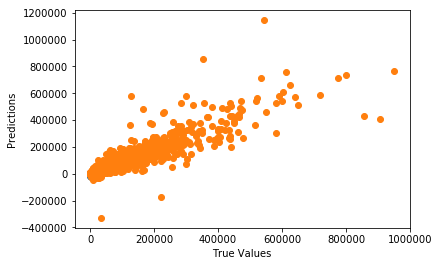

Predict  clicks
Trial run - Score: 0.849896173546
Cross-validated scores: [ 0.86305353  0.92634969  0.89752295  0.90288274  0.9266008   0.90830854
  0.89687477  0.56313511  0.77972643  0.88390642]
Mean accuracy =  0.8548360965
Cross-Predicted Accuracy (R2): 0.860815935972
Mean Absolute Error:  8191.93126326
Mean values:  26589.06833015498  | percent error:  0.308093956567
                                               0          0
0   ext_table1_consumptions_by_type__link_clicks   3.011485
1  ext_table1_consumptions_by_type__other_clicks  -0.196450
2                ext_table1_reactions_like_total   2.452949
3     ext_table1_stories_by_action_type__comment   6.585052
4        ext_table1_stories_by_action_type__like  -0.728441
5       ext_table1_stories_by_action_type__share  48.388964
6                         ext_table1_engaged_fan   0.954794
7                           ext_table1_fan_reach   0.753718
8                         ext_table1_impressions  -0.270062
9                     ext

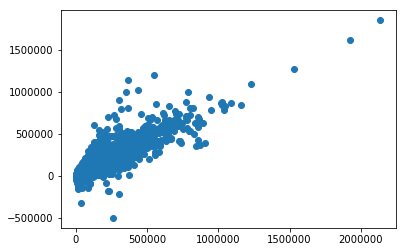

In [101]:
###PREDICTION: Cross-validation
train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("Without cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [54]:
#####REGRESSION: without cross-promotion

train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###overall clicks
res = ols(y = train['ext_twodays_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['ext_twodays_stories_by_action_type__share'], x = train[features])
print(res)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan> + <intercept>

Number of Observations:         37231
Number of Degrees of Freedom:   11

R-squared:         0.8776
Adj R-squared:     0.8776

Rmse:          23525.1397

F-stat (10, 37220): 26690.5987, p-value:     0.0000

Degrees of Freedom: model 10, resid 37220

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
---------------------------------

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
###drop duplicate (buzz_id, external_id) pairs
# train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

In [91]:
####CROSS-PROMOTION FEATURES INCLUDED

In [65]:
df = all_df.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

all_pages = list(df.buzz_account_display_name.unique())
print("Total pages considered: ", len(all_pages))

def get_cross_posted_pages(x):
        tf = df[df.buzz_post_buzz_id == x].sort_values('buzz_post_created_at', ascending = 1)
        return tf.buzz_account_display_name.unique()

df['cross_promotion_pages'] = df['buzz_post_buzz_id'].apply(get_cross_posted_pages)

def generate_cat_pages(x, y):
        if(y in x):
            return list(x).index(y) + 1
        else:
            return math.inf

###categorical features for pages where the link was shared
for pag in all_pages:
#     print("Getting for ", pag)
    df[pag] = df['cross_promotion_pages'].apply(generate_cat_pages, y = pag)

df.to_csv('jan_may_2017_links_cross_posting_info.csv', index = False)

Total pages considered:  88
Working on  4536916
No. of cross-posts =  6


WITH cross-promotion features
Testing for shares!
(29784, 98) (29784,)
(7447, 98) (7447,)


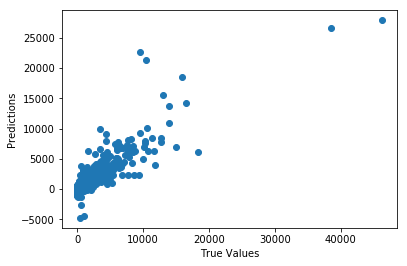

Predict  share
Trial run - Score: 0.805664200192
Cross-validated scores: [ 0.77255442  0.81754588  0.81296912  0.81793601  0.86739322  0.78776374
  0.78920426  0.2803862   0.42085858  0.69752532]
Mean accuracy =  0.706413675914
Cross-Predicted Accuracy (R2): 0.700232621178
Mean Absolute Error:  140.04687257
Mean values:  287.1133732642153  | percent error:  0.487775511734
Testing for clicks!
(29784, 98) (29784,)
(7447, 98) (7447,)


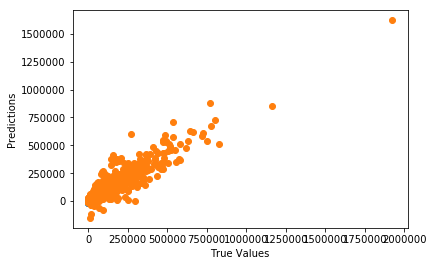

Predict  clicks
Trial run - Score: 0.897515002765
Cross-validated scores: [ 0.86673133  0.9270701   0.89800218  0.90515488  0.92865339  0.91113331
  0.89817431  0.58268658  0.78795223  0.8858342 ]
Mean accuracy =  0.859139251861
Cross-Predicted Accuracy (R2): 0.864796005025
Mean Absolute Error:  8389.1062417
Mean values:  26589.06833015498  | percent error:  0.31550959731
                                                0           0
0    ext_table1_consumptions_by_type__link_clicks    1.970881
1   ext_table1_consumptions_by_type__other_clicks   -0.763619
2                 ext_table1_reactions_like_total    8.017193
3      ext_table1_stories_by_action_type__comment    7.932197
4         ext_table1_stories_by_action_type__like   -5.353048
5        ext_table1_stories_by_action_type__share   45.505037
6                          ext_table1_engaged_fan    1.993317
7                            ext_table1_fan_reach    0.728080
8                          ext_table1_impressions   -0.239624
9    

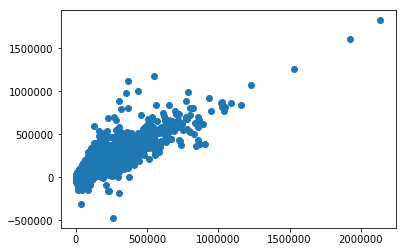

In [100]:
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [93]:
#####REGRESSION: WITH cross-promotion
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###overall clicks
res = ols(y = train['ext_twodays_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['ext_twodays_stories_by_action_type__share'], x = train[features])
print(res)

WITH cross-promotion features


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan> + <BuzzFeed Quiz>
             + <BuzzFeed Japan> + <BuzzFeed UK> + <BuzzFeed Brasil> + <BuzzFeed Japan News>
             + <BuzzFeed Deutschland> + <BuzzFeed News> + <BuzzFeed>
             + <BuzzFeed Canada> + <BuzzFeed Video> + <Cocoa Butter>
             + <BuzzFeed Oz Politics> + <Quizzes En Español> + <Obsessed by BuzzFeed>
             + <BuzzFeed News BR> + <Buy Me That> + <BuzzFeed UK Politics> + <BuzzFeed Australia>
             + <BuzzFeed Rew

In [99]:
y.mean()

26589.06833015498

In [125]:
for sample in all_df['buzz_post_buzz_id'][5:6]:
    t = all_df[all_df.buzz_post_buzz_id == sample]

In [134]:
t.sort_values('buzz_post_created_at')[:10]

,buzz_external_id,buzz_post_parent_external_id,buzz_post_created_at,buzz_account_display_name,buzz_post_type_name,buzz_post_buzz_id,buzz_campaign_uri,buzz_campaign_name,ext_table1_stats_date,ext_external_id,...,ext_table1_stories_by_action_type__like,ext_table1_stories_by_action_type__share,ext_table1_engaged_fan,ext_table1_fan_reach,ext_table1_impressions,ext_table1_impressions_fan,ext_table1_firsthour_stats_date,ext_twodays_consumptions_by_type__link_clicks,ext_twodays_stories_by_action_type__share,ext_twodays_stats_date
12,254018121357088_1280495785375978,0.0,2017-02-18 03:18:26.856946,BuzzFeed Style,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 03:20:04 UTC,254018121357088_1280495785375978,...,297.0,21.0,7753,74370,102726,99577,2017-02-18 04:20:05 UTC,73245.0,115.0,2017-02-20 04:01:28 UTC
18226,254018121357088_1280495785375978,0.0,2017-02-18 03:18:26.856946,BuzzFeed Style,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 03:20:04 UTC,254018121357088_1280495785375978,...,297.0,21.0,7753,74370,102726,99577,2017-02-18 04:20:05 UTC,73281.0,115.0,2017-02-20 04:15:07 UTC
4,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5434.0,14.0,2017-02-20 05:30:18 UTC
5,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5434.0,14.0,2017-02-20 05:30:18 UTC
9360,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5431.0,14.0,2017-02-20 05:15:10 UTC
9361,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5431.0,14.0,2017-02-20 05:15:10 UTC
45414,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5429.0,14.0,2017-02-20 05:01:32 UTC
45415,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5429.0,14.0,2017-02-20 05:01:32 UTC
14215,257431141042836_1197466950372579,0.0,2017-02-19 00:29:11.218463,BuzzFeed Rewind,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-19 00:30:06 UTC,257431141042836_1197466950372579,...,64.0,8.0,2573,31586,40832,39826,2017-02-19 01:30:05 UTC,23343.0,57.0,2017-02-21 01:02:52 UTC
23013,257431141042836_1197466950372579,0.0,2017-02-19 00:29:11.218463,BuzzFeed Rewind,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-19 00:30:06 UTC,257431141042836_1197466950372579,...,64.0,8.0,2573,31586,40832,39826,2017-02-19 01:30:05 UTC,23344.0,57.0,2017-02-21 01:15:07 UTC


In [119]:
train[all_df.buzz_post_buzz_id == sample].sort_values('ext_table1_firsthour_stats_date')['ext_table1_consumptions_by_type__link_clicks']

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


18226     7976.0
9361       628.0
14215     2746.0
21213    47957.0
10482     1663.0
Name: ext_table1_consumptions_by_type__link_clicks, dtype: float64

In [120]:
train[all_df.buzz_post_buzz_id == sample].sort_values('ext_table1_firsthour_stats_date')['ext_twodays_stories_by_action_type__share']

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


18226    115.0
9361      14.0
14215     57.0
21213    157.0
10482     21.0
Name: ext_twodays_stories_by_action_type__share, dtype: float64

In [122]:
sample

4467070